# IN3050/IN4050 2025: Week 05, Perceptron
### Introduction
The goal of this week's exercise set is to get familiar with the perceptron classifier.
The set has two parts.
The first part does not involve programming or Python.
The questions in this part are the type of questions you will meet at the exam.
They can (and should) be solved by pen and paper or a word processor and, eventually, a calculator.

The second part involves implementations in Python.

## Part 1: Exam type exercises

### Exercise I
You want to predict if movies will be profitable based on their screenplays. You hire two critics A and B to read a script you have and rate it on a scale of 1 to 6. The critics are not perfect; here are five data points including the critics' scores and the performance of the movie:
```
| Movie # | Alice    | Bob       | Profitable? |
|  _______|__________|___________|_____________|
|  1      | 1        | 1         |      no     |
|  _______|__________|___________|_____________|
|  2      | 4        | 3         |      yes    |
|  _______|__________|___________|_____________|
|  3      | 3        | 5         |      yes    |
|  _______|__________|___________|_____________|
|  4      | 5        | 6         |      yes    |
|  _______|__________|___________|_____________|
|  5      | 2        | 3         |      no     |
|  _______|__________|___________|_____________|
```
Is the data linearly separable? Plot the data on a sheet of paper; label profitable movies with + and non-profitable movies with x and determine if the data are linearily separable.

# Answer

```
     A
|         |          |           |           |           |
|  _______|__________|___________|___________|___________|
|    =    |          |           |           |     +     |
|  _______|__________|___________|___________|___________|
|         |    =     |     +     |           |           |
|  _______|__________|___________|___________|___________|
|         |          |     =     |     +     |           |
|  _______|__________|___________|___________|___________|
|         |          |     -     |     =     |           |
|  _______|__________|___________|___________|___________|
|    -    |          |           |           |     =     |
|  _______|__________|___________|___________|___________|    B
```

### Exercise II

You decide to use a perceptron to classify your data. 
Suppose you directly use the scores given above as features,
$x_1=$ score given by A and $x_2=$ score given by B.
You also add a bias term in position 0, $x_0=-1$.

Run one pass through the data with the perceptron algorithm, filling out the table below. 
Go through the data points in order, e.g., using data from movie 1 at step 1. 
Suppose we start with the weights $(w_0, w_1, w_2)=(1,0,0)$. 
Use $1$ as learning rate.

For each of the 5 steps, write the 
the score, and whether the prediction is correct.
Calculate the new weights, enter them at the next line and repeat.

```
| Step | Weights    | Score                     | Correct prediction? |
_______|____________|___________________________|______________________|
|  1   | (1, 0, 0)  | 1*(-1) + 0*1 + 0 * 1 = -1 |      yes             |
_______|____________|___________________________|______________________|
|  2   | (1, 0, 0)  | 1*(-1) + 0*4 + 0 * 3 = -1 |      no              |
_______|____________|___________________________|______________________|
|  3   | (0, 4, 3)  | 0*(-1) + 4*3 + 3 * 5 = 27 |      yes             |
_______|____________|___________________________|______________________|
|  4   | (0, 4, 3)  | 0*(-1) + 4*5 + 3 * 6 = 38 |      yes             |
_______|____________|___________________________|______________________|
|  5   | (0, 4, 3)  | 0*(-1) + 4*2 + 3 * 3 = 17 |      no              |
_______|____________|___________________________|______________________|
|  6   | (1, 2, 0)  |
|______|____________|

```

### Exercise III
Have weights been learned that separate the data? 
Plot the data together with the decision boundary given by the weigths which you are left with after you have run all the data points the first round in the previous question.

In [10]:
X = [(-1,1,1),(-1,4,3),(-1,3,5),(-1,5,6),(-1,2,3)]
w = (1,2,0)
print([sum([f * s for f, s in zip(x, w)]) for x in X])
print("no")

[1, 7, 5, 9, 3]
no


### Exercise IV
More generally, irrespective of the training data, you want to know if your features are powerful enough to allow you to handle a range of scenarios. Which of the following scenarios can a perceptron using the features above  indeed perfectly classify movies which are profitable according to the given rules:

1. Your reviewers are awesome: if the total of their scores is more than 8, then the movie will definitely be profitable, and otherwise it won't be.

2. Your reviewers are art critics. Your movie will be profitable if and only if each reviewer gives either a score of 3 or a score of 4.

3. Your reviewers have weird but different tastes. Your movie will be profitable if and only if both reviewers agree.

## Part 2: Implementing the Perceptron Classifier

### Exercise V
We will implement the perceptron classifier. We will implement it as a class similarly to how we implemented the *k*NN-classifier last week. You should implement the two methods `fit` and `predict`. You don't need an `__init__` method. You may include other methods if you find them convenient.

The main part of the perceptron classifier is the `fit` method that trains the perceptron.
`eta` is the learning rate.
One `epoch` is a run through all the training data.
We have set the default to one epoch, but you might need more.
Remember to add the bias to the data.

In [12]:
class PyClassifier():
    """Common methods to all Python classifiers --- if any
    
    Nothing here yet"""

In [136]:
class PyPerClassifier(PyClassifier):
    """Simple perceptron python classifier"""
    
    def fit(self, X_train, y_train, eta=1, epochs=1):
        """Train the self.weights on the training data with learning
        rate eta, running epochs many epochs"""
        dim = len(X_train[0])+1
        self.weights = [0] * dim
        self.weights[0] = 1
        visited = set()

        for e in range(epochs):
            if tuple(self.weights.copy()) in visited:
                print("ASDASD")
            visited.add(tuple(self.weights.copy()))
            for x, t in zip(X_train, y_train):
                new_x = (-1, x[0], x[1])
                score = sum([f*s for f, s in zip(self.weights, new_x)])

                # keep weights
                if (score > 0 and t == 1) or (score <= 0 and t == 0):
                    continue
                else:
                    y = 0 if score < 0 else 1
                    for i in range(dim):
                        self.weights[i] = self.weights[i] - eta*(y-t)*new_x[i]
            
    
    def predict(self, X):
        """Predict the class for the items (in the list) X"""
        return [1 if sum([f*s for f, s in zip(self.weights, [-1] + list(x))]) > 0 else 0 for x in X]

## Dataset
We will train and test the classifier on the same sythetic dataset as we used for the *k*NN last week.

In [76]:
from sklearn.datasets import make_blobs
import pylab as plt
X_np, y_np = make_blobs(n_samples=200, centers=[[0,0],[1,2]], 
                  n_features=2, random_state=2019)
X1 = [(X_np[i,0], X_np[i,1]) for i in range(X_np.shape[0])]
t1 = [y_np[i] for i in range(X_np.shape[0])]

In [77]:
def show(X, y, marker='.'):
    labels = set(y)
    cl = {lab : [] for lab in labels}
    # cl[lab] shall contain the datapoints labeled lab
    for (a, b) in zip(X, y):
        cl[b].append(a)
    for lab in labels:
        plt.plot([a[0] for a in cl[lab]], [a[1] for a in cl[lab]], 
                 marker, label="class {}".format(lab))
    plt.legend()

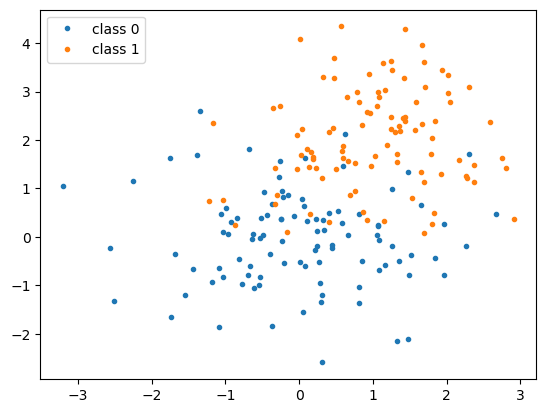

In [78]:
show(X1, t1)

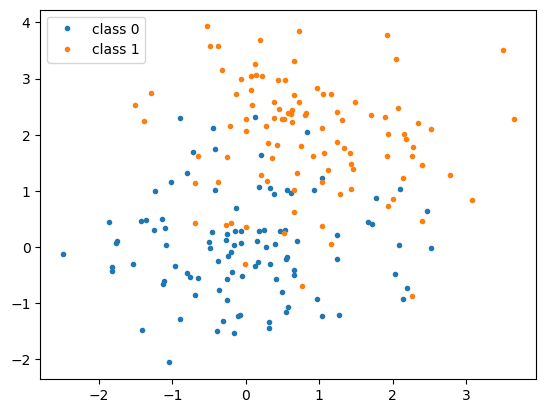

In [121]:
X_np, y_np = make_blobs(n_samples=200, centers=[[0,0],[1,2]], 
                  n_features=2, random_state=2020)
X2 = [(X_np[i,0], X_np[i,1]) for i in range(X_np.shape[0])]
t2 = [y_np[i] for i in range(X_np.shape[0])]
show(X2, t2)

In [138]:
def check_accuracy(pred, sol):
    return sum([1 if p == s else 0 for p, s in zip(pred, sol)]) / len(sol)

c = PyPerClassifier()
c.fit(X1, t1, epochs=100000)

pred1 = c.predict(X1)
print("accuracy with X1 t1: ", check_accuracy(pred1, t1))

pred2 = c.predict(X2)
print("accuracy with X1 t2: ", check_accuracy(pred2, t2))

accuracy with X1 t1:  0.85
accuracy with X1 t2:  0.83


### Exercise VI
Train PyPerClassifier on  X1, t1 and test on X2, t2 as with the *k*NN-classifier. Try various numbers of epochs and see whether it makes a difference.

Is X2, t2 linearly separable?

How does the results compare to the *k*NN classifier from last week?

### Exercise VII: Termination and Weights

- Modify the *fit*-method of the classifier such that training halts when there are no more updates, and it is possible to inspect how many epochs it took.
- Run this on the five points film critics dataset. How many epochs does it take to reach completion?
- What are the final weights? Can you plot the decision boundary that corresponds to these weights together with the data set?